In [49]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier
import xgboost as xgb
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from matplotlib import pyplot
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import StackingClassifier

In [2]:
train = pd.read_csv('train.csv')
print(train.shape)
print(train.columns)
print(train['Application order'].unique())

(76518, 38)
Index(['id', 'Marital status', 'Application mode', 'Application order',
       'Course', 'Daytime/evening attendance', 'Previous qualification',
       'Previous qualification (grade)', 'Nacionality',
       'Mother's qualification', 'Father's qualification',
       'Mother's occupation', 'Father's occupation', 'Admission grade',
       'Displaced', 'Educational special needs', 'Debtor',
       'Tuition fees up to date', 'Gender', 'Scholarship holder',
       'Age at enrollment', 'International',
       'Curricular units 1st sem (credited)',
       'Curricular units 1st sem (enrolled)',
       'Curricular units 1st sem (evaluations)',
       'Curricular units 1st sem (approved)',
       'Curricular units 1st sem (grade)',
       'Curricular units 1st sem (without evaluations)',
       'Curricular units 2nd sem (credited)',
       'Curricular units 2nd sem (enrolled)',
       'Curricular units 2nd sem (evaluations)',
       'Curricular units 2nd sem (approved)',
       'Curr

In [45]:
X = train.drop(['Target', 'id'], axis = 1)
y = train['Target']
y.replace(['Dropout', 'Enrolled', 'Graduate'], [0,1,2], inplace = True)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 69412, stratify = y)

param_grid = {
    'max_depth': np.arange(4,9,1),
    'eta': np.arange(0.01 , 0.2, 0.02),
    'min_child_weight':range(1,6,2),
    'gamma':[i/10.0 for i in range(0,5)],
    'subsample':[i/10.0 for i in range(6,10)],
    'colsample_bytree':[i/10.0 for i in range(6,10)],
}
# param_grid = {
#     'max_depth': [6],
#     'eta': [0.15],
#     'min_child_weight':[5],
#     'gamma':[0.1],
#     'subsample': [0.8],
#     'colsample_bytree':[0.9],
# }
model = XGBClassifier(device="cuda")

grid_acc = RandomizedSearchCV(model, param_grid,n_iter = 200, cv = 5, scoring = 'accuracy', verbose=1, n_jobs = 6)
grid_acc.fit(X_train, y_train)

#y_pred = model.predict(X_test)
#print(accuracy_score(y_test, y_pred))




#best score cv = 5 is 0.83

Fitting 5 folds for each of 200 candidates, totalling 1000 fits


RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device='cuda',
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_ra...
                                           n_estimators=None, n_jobs=None,
                                           num_parallel_tree=None,
                                           random_state=None, ...),
                   n_iter=200, n_jobs=6,
                   param_distributions={'colsample_bytree': [0.6, 0.7, 0.8,
                                                             0.9],
                                        'eta': array([0.01, 0.03, 0.05, 0.07, 0.09, 0.11, 0.13, 0.15, 0.17, 0.19]),
                                        'gamma': [0.0, 0.1, 0.2, 0.3, 0.4],
                                        'max_depth': array([4, 5, 6, 7, 8]),
                                        'min_child_weight': range(1, 6, 2),
                                        'subsample': [0.6, 0.7, 0.8, 0.9]},
                   scoring='accuracy', verbose=1)

In [47]:
print(grid_acc.best_estimator_.get_params())
print(grid_acc.best_score_)

{'objective': 'multi:softprob', 'base_score': None, 'booster': None, 'callbacks': None, 'colsample_bylevel': None, 'colsample_bynode': None, 'colsample_bytree': 0.6, 'device': 'cuda', 'early_stopping_rounds': None, 'enable_categorical': False, 'eval_metric': None, 'feature_types': None, 'gamma': 0.3, 'grow_policy': None, 'importance_type': None, 'interaction_constraints': None, 'learning_rate': None, 'max_bin': None, 'max_cat_threshold': None, 'max_cat_to_onehot': None, 'max_delta_step': None, 'max_depth': 5, 'max_leaves': None, 'min_child_weight': 5, 'missing': nan, 'monotone_constraints': None, 'multi_strategy': None, 'n_estimators': None, 'n_jobs': None, 'num_parallel_tree': None, 'random_state': None, 'reg_alpha': None, 'reg_lambda': None, 'sampling_method': None, 'scale_pos_weight': None, 'subsample': 0.6, 'tree_method': None, 'validate_parameters': None, 'verbosity': None, 'eta': 0.15}
0.830487136989799


In [52]:
LR = LogisticRegression(penalty = 'l2', n_jobs= 6)
LR.fit(X_train, y_train)
lr_pred = LR.predict(X_test)
print(accuracy_score(y_test, lr_pred))

0.7420282279142708


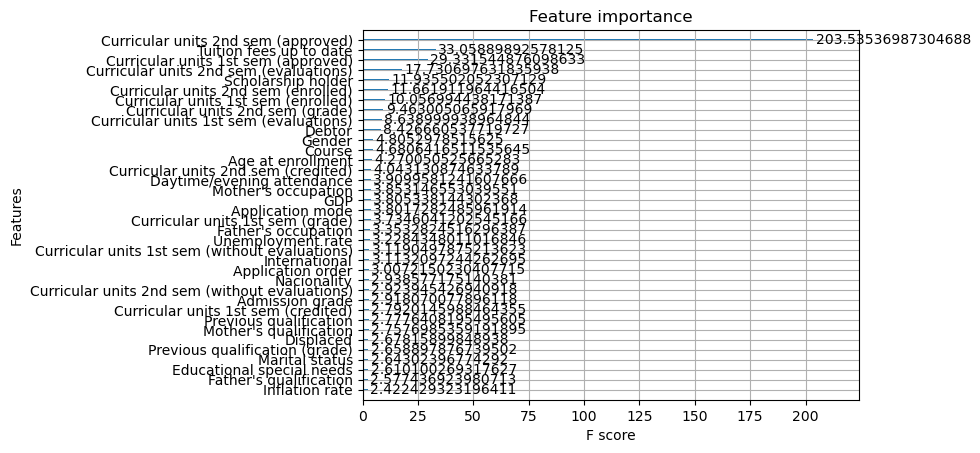

0.8324098274960795

In [26]:
model2 = XGBClassifier(max_depth = 6, eta = 0.15, gamma = 0.1, min_child_weight = 5, subsample = 0.8, colsample_bytree = 0.9 ,device="cuda")
model2.fit(X_train, y_train)
xgb.plot_importance(model2, importance_type='gain')
pyplot.show()

y_pred = model2.predict(X_test)
accuracy_score(y_test, y_pred)



In [42]:
test = pd.read_csv('test.csv')
#print(test.info())
iddf = test['id']
test = test.drop(['id'], axis = 1)
y_test_pred = pd.DataFrame({ 'Target' : model2.predict(test)}, index = iddf)
y_test_pred.replace([0,1,2], ['Dropout', 'Enrolled', 'Graduate'],  inplace = True)

print(y_test_pred)

y_test_pred.to_csv('sol.csv')

          Target
id              
76518    Dropout
76519   Graduate
76520   Graduate
76521   Enrolled
76522   Enrolled
...          ...
127525   Dropout
127526   Dropout
127527   Dropout
127528   Dropout
127529   Dropout

[51012 rows x 1 columns]
